## Some visualizations

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

Import the datasets, from which we will derive the lat-lon grids.

In [2]:
ERA5_q_2001 = xr.open_dataset("/m100_work/ICT22_ESP_0/vblasone/ERA5/q_2001.nc")
GRIPHO = xr.open_dataset("/m100_work/ICT22_ESP_0/vblasone/GRIPHO/gripho-v1_1h_TSmin30pct_2001-2016_cut.nc")

In [3]:
lon_ERA5, lat_ERA5 = ERA5_q_2001.longitude, ERA5_q_2001.latitude
LON_ERA5, LAT_ERA5 = np.meshgrid(lon_ERA5, lat_ERA5)

LON_GRIPHO, LAT_GRIPHO = GRIPHO.lon, GRIPHO.lat

Check the boundaries.

In [4]:
# ERA5
print(f'ERA5\nLon: from {lon_ERA5.values.min()}, to {lon_ERA5.values.max()}, \
            \nLat: from {lat_ERA5.values.min()}, to {lat_ERA5.values.max()}')

# GRIPHO
print(f'\nGRIPHO\nLon: from {LON_GRIPHO.values.min()}, to {LON_GRIPHO.values.max()}, \
            \nLat: from {LAT_GRIPHO.values.min()}, to {LAT_GRIPHO.values.max()}')

ERA5
Lon: from -36.0, to 45.0,             
Lat: from 20.0, to 75.0

GRIPHO
Lon: from 6.409093379974365, to 20.349220275878906,             
Lat: from 36.20995330810547, to 47.48561096191406


Some plotting utilities

In [5]:
zones = []
with open('./Italia.txt') as f:
    lines = f.read()
    for zone in lines.split(';'):
        zones.append(zone)
for i in range(len(zones)):
    zones[i] = zones[i].split('\n')
    for j in range(len(zones[i])):
        zones[i][j] = zones[i][j].split(',')
    if [''] in zones[i]:
        zones[i].remove([''])
for i in range(len(zones)):
    for j in range(len(zones[i])):
        if '' in zones[i][j]:
            zones[i][j].remove('')
        if zones[i][j] == []:
            del zones[i][j]
            continue
        for k in range(len(zones[i][j])):
            zones[i][j][k] = float(zones[i][j][k])

In [6]:
def plot_italy(zones):
    j = 0
    for zone in zones:
        x_zone = [zone[i][0] for i in range(len(zone)) if i > 0]
        y_zone = [zone[i][1] for i in range(len(zone)) if i > 0]
        plt.fill(x_zone, y_zone, 'k', alpha=0.1)
        plt.plot(x_zone, y_zone, 'k', alpha=1, linewidth=1)
        j += 1


In [7]:
def draw_rectangle(x_min, x_max, y_min, y_max, color, fill=False, fill_color=None, alpha=0.5):
    y_grid = [y_min, y_min, y_max, y_max, y_min]
    x_grid = [x_min, x_max, x_max, x_min, x_min]
    plt.plot(x_grid, y_grid, color=color)
    if fill:
        if fill_color==None:
            fill_color = color
        plt.fill(x_grid, y_grid, color=fill_color, alpha=alpha)

#### Plots

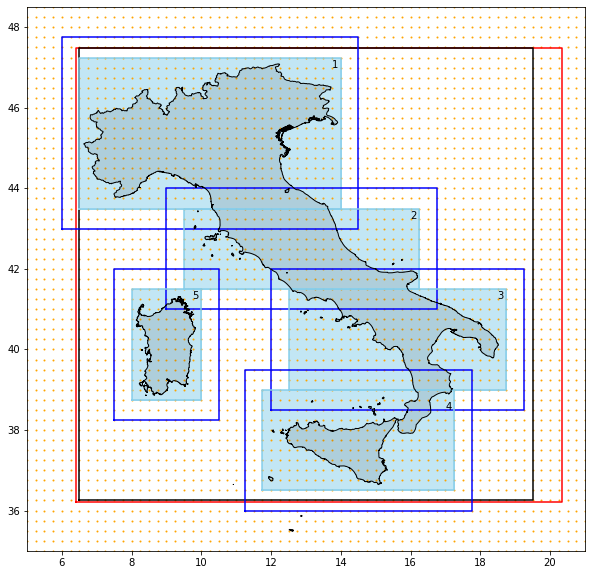

In [8]:
dist=0.5
fig, ax = plt.subplots(1,figsize=(10,10))
draw_rectangle(LON_GRIPHO.values.min(),LON_GRIPHO.values.max(),LAT_GRIPHO.values.min(),LAT_GRIPHO.values.max(),'red')
draw_rectangle(6.484375,19.515625,36.2625,47.4875,'black')
draw_rectangle(6.5,14,43.5,47.25,'skyblue',fill=True)    # SLICE_1 - processed
draw_rectangle(6.5-dist,14+dist,43.5-dist,47.25+dist,'blue')    # SLICE_1 - processed
plt.text(13.75, 47, '1')
draw_rectangle(9.5,16.25,41.5,43.5,'skyblue',fill=True)  # SLICE_2 
draw_rectangle(9.5-dist,16.25+dist,41.5-dist,43.5+dist,'blue')  # SLICE_2 
plt.text(16, 43.25, '2')
draw_rectangle(12.5, 18.75,39,41.5,'skyblue',fill=True)  # SLICE_3 - processed
draw_rectangle(12.5-dist, 18.75+dist,39-dist,41.5+dist,'blue')  # SLICE_3 - processed
plt.text(18.5, 41.25, '3')
draw_rectangle(11.75,17.25,36.5,39,'skyblue',fill=True)  # SLICE_4 - processed
draw_rectangle(11.75-dist,17.25+dist,36.5-dist,39+dist,'blue')  # SLICE_4 - processed
plt.text(17, 38.5, '4')
draw_rectangle(8,10,38.75,41.5,'skyblue',fill=True)      # SLICE_5 - processed
draw_rectangle(8-dist,10+dist,38.75-dist,41.5+dist,'blue')      # SLICE_5 - processed
plt.text(9.75, 41.25, '5')
plt.scatter(LON_ERA5, LAT_ERA5, color='orange', s=1, label='ERA5')
plt.ylim([35,48.5])
plt.xlim([5,21])
plot_italy(zones)

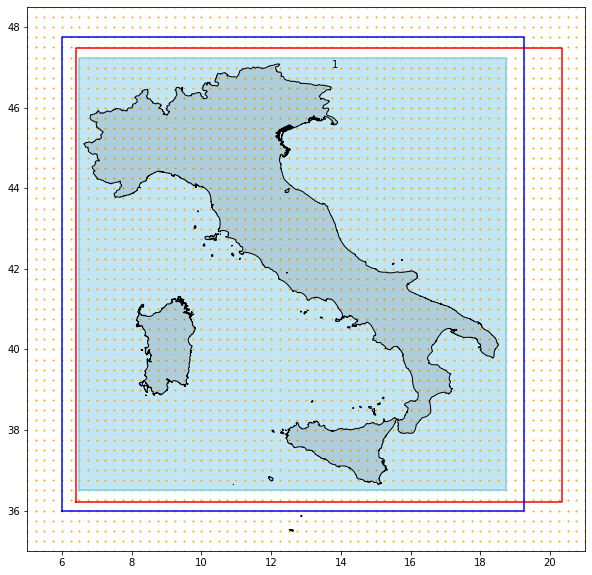

In [9]:
dist=0.5
fig, ax = plt.subplots(1,figsize=(10,10))
draw_rectangle(LON_GRIPHO.values.min(),LON_GRIPHO.values.max(),LAT_GRIPHO.values.min(),LAT_GRIPHO.values.max(),'red')
# draw_rectangle(6.484375,19.515625,36.2625,47.4875,'black')
draw_rectangle(6.5, 18.75,36.5,47.25,'skyblue',fill=True)    # SLICE_1 - processed
draw_rectangle(6.5-dist, 18.75+dist,36.5-dist,47.25+dist,'blue')    # SLICE_1 - processed
plt.text(13.75, 47, '1')
plt.scatter(LON_ERA5, LAT_ERA5, color='orange', s=1, label='ERA5')
plt.ylim([35,48.5])
plt.xlim([5,21])
plot_italy(zones)

In [10]:
print('ERA5 sliced:   ',6.5-dist, 18.75+dist,36.5-dist,47.25+dist)
print('GRIPHO sliced: ', 6.5, 18.75,36.5,47.25)

ERA5 sliced:    6.0 19.25 36.0 47.75
GRIPHO sliced:  6.5 18.75 36.5 47.25


In [11]:
LON_GRIPHO_new_list = np.linspace(6.484375,19.515625,418)
LAT_GRIPHO_new_list = np.linspace(36.2625, 47.4875,450)

LON_GRIPHO_new, LAT_GRIPHO_new = np.meshgrid(LON_GRIPHO_new_list, LAT_GRIPHO_new_list)

/m100/home/userexternal/vblasone/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


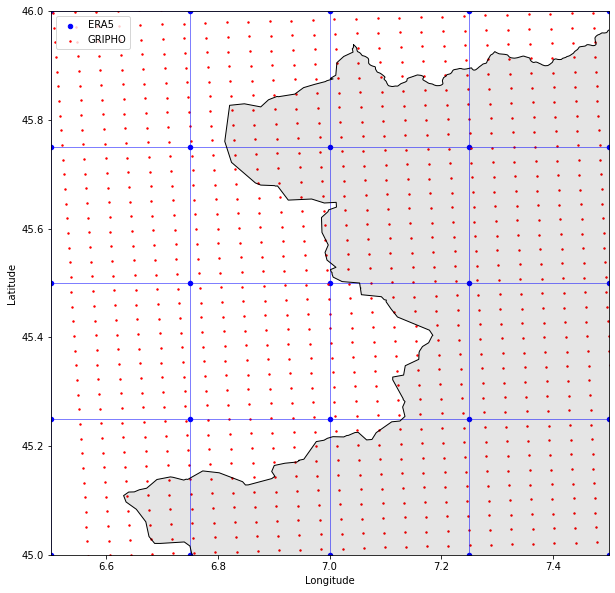

In [12]:
fig, ax = plt.subplots(1, figsize=(10,10))
plt.scatter(LON_ERA5, LAT_ERA5, color='blue', s=20, label='ERA5')
plt.scatter(LON_GRIPHO, LAT_GRIPHO, color='red', s=2, label='GRIPHO')
# plt.scatter(LON_GRIPHO_new, LAT_GRIPHO_new, color='black', s=2, label='GRIPHO')
[plt.axhline(y = yi, color = 'b', linestyle = '-', linewidth = 0.5) for yi in LAT_ERA5[:,0]]
[plt.axvline(x = xi, color = 'b', linestyle = '-', linewidth = 0.5) for xi in LON_ERA5[0,:]]
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim([6.50,7.50])
plt.ylim([45,46])
plt.legend()
plot_italy(zones)

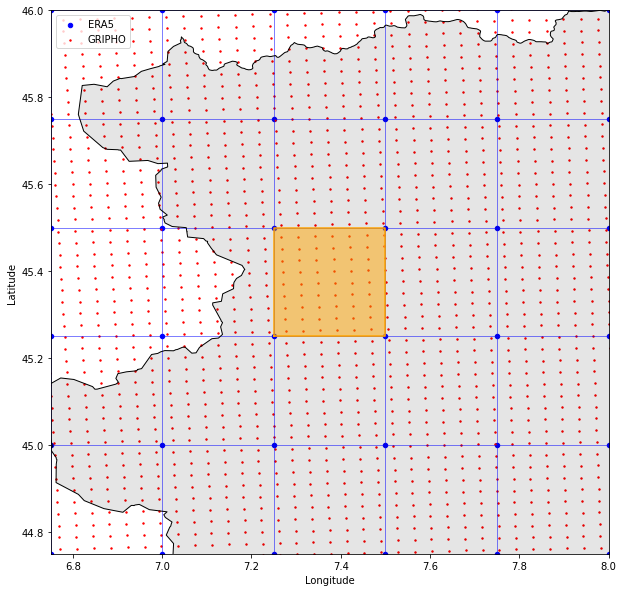

In [13]:
fig, ax = plt.subplots(1, figsize=(10,10))
plt.scatter(LON_ERA5, LAT_ERA5, color='blue', s=20, label='ERA5')
plt.scatter(LON_GRIPHO, LAT_GRIPHO, color='red', s=2, label='GRIPHO')
# plt.scatter(LON_GRIPHO_new, LAT_GRIPHO_new, color='black', s=2, label='GRIPHO')
[plt.axhline(y = yi, color = 'b', linestyle = '-', linewidth = 0.5) for yi in LAT_ERA5[:,0]]
[plt.axvline(x = xi, color = 'b', linestyle = '-', linewidth = 0.5) for xi in LON_ERA5[0,:]]
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim([6.75,8])
plt.ylim([44.75,46])
plt.legend()
plot_italy(zones)
draw_rectangle(7.25,7.50,45.25, 45.5, 'orange', fill=True, alpha=0.5)

In [14]:
GRIPHO.x[1] - GRIPHO.x[0]

<xarray.DataArray 'x' ()>
array(3000.)

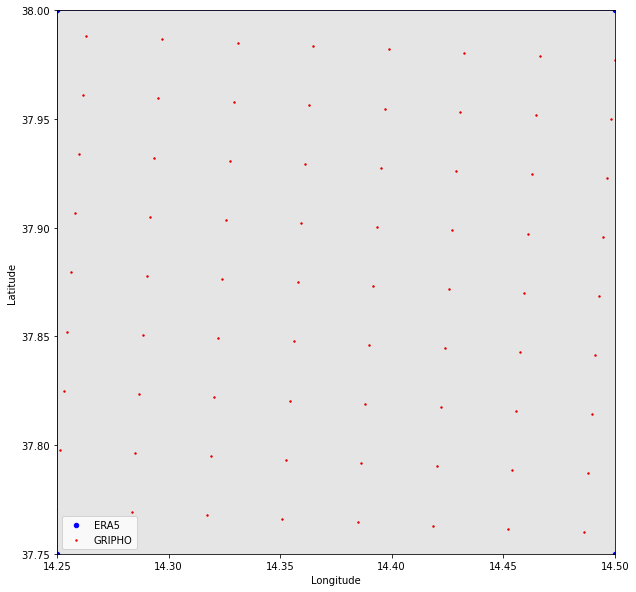

In [17]:
fig, ax = plt.subplots(1, figsize=(10,10))
plt.scatter(LON_ERA5, LAT_ERA5, color='blue', s=20, label='ERA5')
plt.scatter(LON_GRIPHO, LAT_GRIPHO, color='red', s=2, label='GRIPHO')
# plt.scatter(LON_GRIPHO_new, LAT_GRIPHO_new, color='black', s=2, label='GRIPHO')
[plt.axhline(y = yi, color = 'b', linestyle = '-', linewidth = 0.5) for yi in LAT_ERA5[:,0]]
[plt.axvline(x = xi, color = 'b', linestyle = '-', linewidth = 0.5) for xi in LON_ERA5[0,:]]
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim([14.25,14.5])
plt.ylim([37.75,38])
plt.legend()
plot_italy(zones)